# Milestone-1: Data description and Exploratory Data Analysis

This notebook corresponds to the first stage of the Machine Learning final project, as part of the Copernicus Master in Digital Earth, in the Data Science track at UBS.

The project is focused on properties' price prediction for he city of Ames, Iowa, Us. The different steps and stages of the work are developed and documented in the notebook.

### 1: Literal description of the dataset

##### Dataset collection
This project will be centered around properties' prices prediction, using a dataset from the city of Ames, Iowa, United States. This dataset was obtained from the [House Price - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) from the website Kaggle. In there, the dataset is made available for the means of the competition, but with rights allowing to use it for academic purposes, as long as it is not made publicly available ([see section 7.A of copetition rules](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules#7.-competition-data.)).
## change this to the new dataset info

##### Meaning of the dataset
The Ames' properties prices contains .. records of individual residential properties sold in Ames, IA from 2006 to 2010. Each record contains the selling price, and a group of 81 descriptive variables, related to different characteristics of the property, their environment and the selling transaction itself. All these attributes provide a detailed description of the operations and, together with the big amount of records, position the dataset as an excellent input for developing, training and testin diverse sources of Machine Learning models. 
Moreover, while the registers do not contain the exact location of the properties, they do include characteristics related to location and environment, such as neighbourhood, proximity to avenues and zonning. For this reason, the dataset is extremely interesting in geographic terms, as it allows us to analyse the impact of urban-spatial factors on property values.

##### Explanatory and Response variables
## Explain variables
The analyzed response variable is the property selling price, which is expressed in American Dollars 

#### 1.a. Importing the original dataset

In [171]:
#Importing Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [172]:
#Setting pandas to show all the columns
pd.set_option('display.max_columns', None)

In [173]:
#Importing  and visualizing the dataset
data = pd.read_csv('OpenData/Ames.csv')
data.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


#### 1.b. Renaming variables
In order to get a better and uniform handling of the variables, the columns of the original dataset are renamed, adopting the Pascal case convention (capitalizing the first letter of every word, including the first one). The abreviations for long words are kept the same as in the original dataset.

In [174]:
#Create a dictionary with the old and new variable's names
RenameMapping = {
    'area': 'BldgArea',
    'price': 'SoldPrice',
    'MS.SubClass': 'MSSubClass',
    'MS.Zoning': 'MSZoning',
    'Lot.Frontage': 'LotFrontage',
    'Lot.Area': 'LotArea',
    'Lot.Shape': 'LotShape',
    'Land.Contour': 'LandContour',
    'Lot.Config': 'LotConfig',
    'Land.Slope': 'LandSlope',
    'Condition.1': 'Condition1',
    'Condition.2': 'Condition2',
    'Bldg.Type': 'BldgType',
    'House.Style': 'HouseStyle',
    'Overall.Qual': 'OverallQual',
    'Overall.Cond': 'OverallCond',
    'Year.Built': 'YearBuilt',
    'Year.Remod.Add': 'YearRemodAdd',
    'Roof.Style': 'RoofStyle',
    'Roof.Matl': 'RoofMatl',
    'Exterior.1st': 'Exterior1st',
    'Exterior.2nd': 'Exterior2nd',
    'Mas.Vnr.Type': 'MasVnrType',
    'Mas.Vnr.Area': 'MasVnrArea',
    'Exter.Qual': 'ExterQual',
    'Exter.Cond': 'ExterCond',
    'Bsmt.Qual': 'BsmtQual',
    'Bsmt.Cond': 'BsmtCond',
    'Bsmt.Exposure': 'BsmtExposure',
    'BsmtFin.Type.1': 'BsmtFinType1',
    'BsmtFin.SF.1': 'BsmtFinSF1',
    'BsmtFin.Type.2': 'BsmtFinType2',
    'BsmtFin.SF.2': 'BsmtFinSF2',
    'Bsmt.Unf.SF': 'BsmtUnfSF',
    'Total.Bsmt.SF': 'TotalBsmtSF',
    'Heating.QC': 'HeatingQual',
    'Central.Air': 'CentralAir',
    '1st.Flr.SF': '1stFlrSF',
    '2nd.Flr.SF': '2ndFlrSF',
    'Low.Qual.Fin.SF': 'LowQualFinSF',
    'Bsmt.Full.Bath': 'BsmtFullBath',
    'Bsmt.Half.Bath': 'BsmtHalfBath',
    'Full.Bath': 'FullBath',
    'Half.Bath': 'HalfBath',
    'Kitchen.Qual': 'KitchenQual',
    'TotRms.AbvGrd': 'TotRmsAbvGrd',
    'Fireplaces': 'Fireplaces',
    'Fireplace.Qu': 'FireplaceQu',
    'Garage.Type': 'GarageType',
    'Garage.Yr.Blt': 'GarageYrBlt',
    'Garage.Finish': 'GarageFinish',
    'Garage.Cars': 'GarageCars',
    'Garage.Area': 'GarageArea',
    'Garage.Qual': 'GarageQual',
    'Garage.Cond': 'GarageCond',
    'Paved.Drive': 'PavedDrive',
    'Wood.Deck.SF': 'WoodDeckSF',
    'Open.Porch.SF': 'OpenPorchSF',
    'Enclosed.Porch': 'EnclosedPorchSF',
    '3Ssn.Porch': '3SsnPorchSF',
    'Screen.Porch': 'ScreenPorchSF',
    'Pool.Area': 'PoolArea',
    'Pool.QC': 'PoolQual',
    'Misc.Feature': 'MiscFeature',
    'Misc.Val': 'MiscVal',
    'Mo.Sold': 'MoSold',
    'Yr.Sold': 'YrSold',
    'Sale.Type': 'SaleType',
    'Sale.Condition': 'SaleCondition',
    'X1st.Flr.SF': 'X1FloorSF',
    'X2nd.Flr.SF': 'X2FloorSF',
    'X3Ssn.Porch': '3SsnPorchSF',
    'Kitchen.AbvGr': 'KitchenAbvGr',
    'Bedroom.AbvGr': 'BedroomAbvGr',
    }

#Applying the name change
data.rename(columns=RenameMapping, inplace=True)
#Visualizing dataset columns
data.columns

Index(['Order', 'PID', 'BldgArea', 'SoldPrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQual', 'CentralAir', 'Electrical', 'X1FloorSF',
       'X2FloorSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

Moreover, we will also remove the "order" column, considering that it is just an index column withou any significative meaning, and the dataset has a meaningful identificator give by the column "PID"

In [175]:
#Dropping 'Order' column
data = data.drop('Order', axis=1)
#Visualizing dataset columns
data.columns

Index(['PID', 'BldgArea', 'SoldPrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQual', 'CentralAir', 'Electrical', 'X1FloorSF', 'X2FloorSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
 

As a last step, before moving to data split, we check if the target variable has any missing value, given that this ould be a significant problem for the model

In [176]:
print(data['SoldPrice'].isna().any())

False


### 2. Data Split into Train and Test

Following the generally agreed good practices on Machine Learning models treatment, the categorical variables encoding, as well as the NA values handling and EDA are performed after the data splitting is done. Following this workflow, all the previously mentioned steps are only applied to the training dataset, avoiding data leakage between training and test sets.

#### 2.a. Data Split and Parameters Selection:
**test_size:** For the data splitting, a rate of 80/20 (80% training data and 20% testing data) is adopted, for being one of the most usuals splitting rates, which also results adequate for the number of data points the dataset has.

**random_state:** Allows fixing the seed for the random division. A random number is assigned which, while kept the same, will output the same results each time the random diviion is ran.

In [177]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=33)

#### 2.b. Checking Train/Test data distribution

##### 2.b.1. Variables Kernel Density Plot
To check if the distribution of the training and test sets are similar, we will firstly perform a visual analysis. This is done by a plotting kernel density plot of each of the numerical variables distribution, comparing the distribution of the training set against the test set.

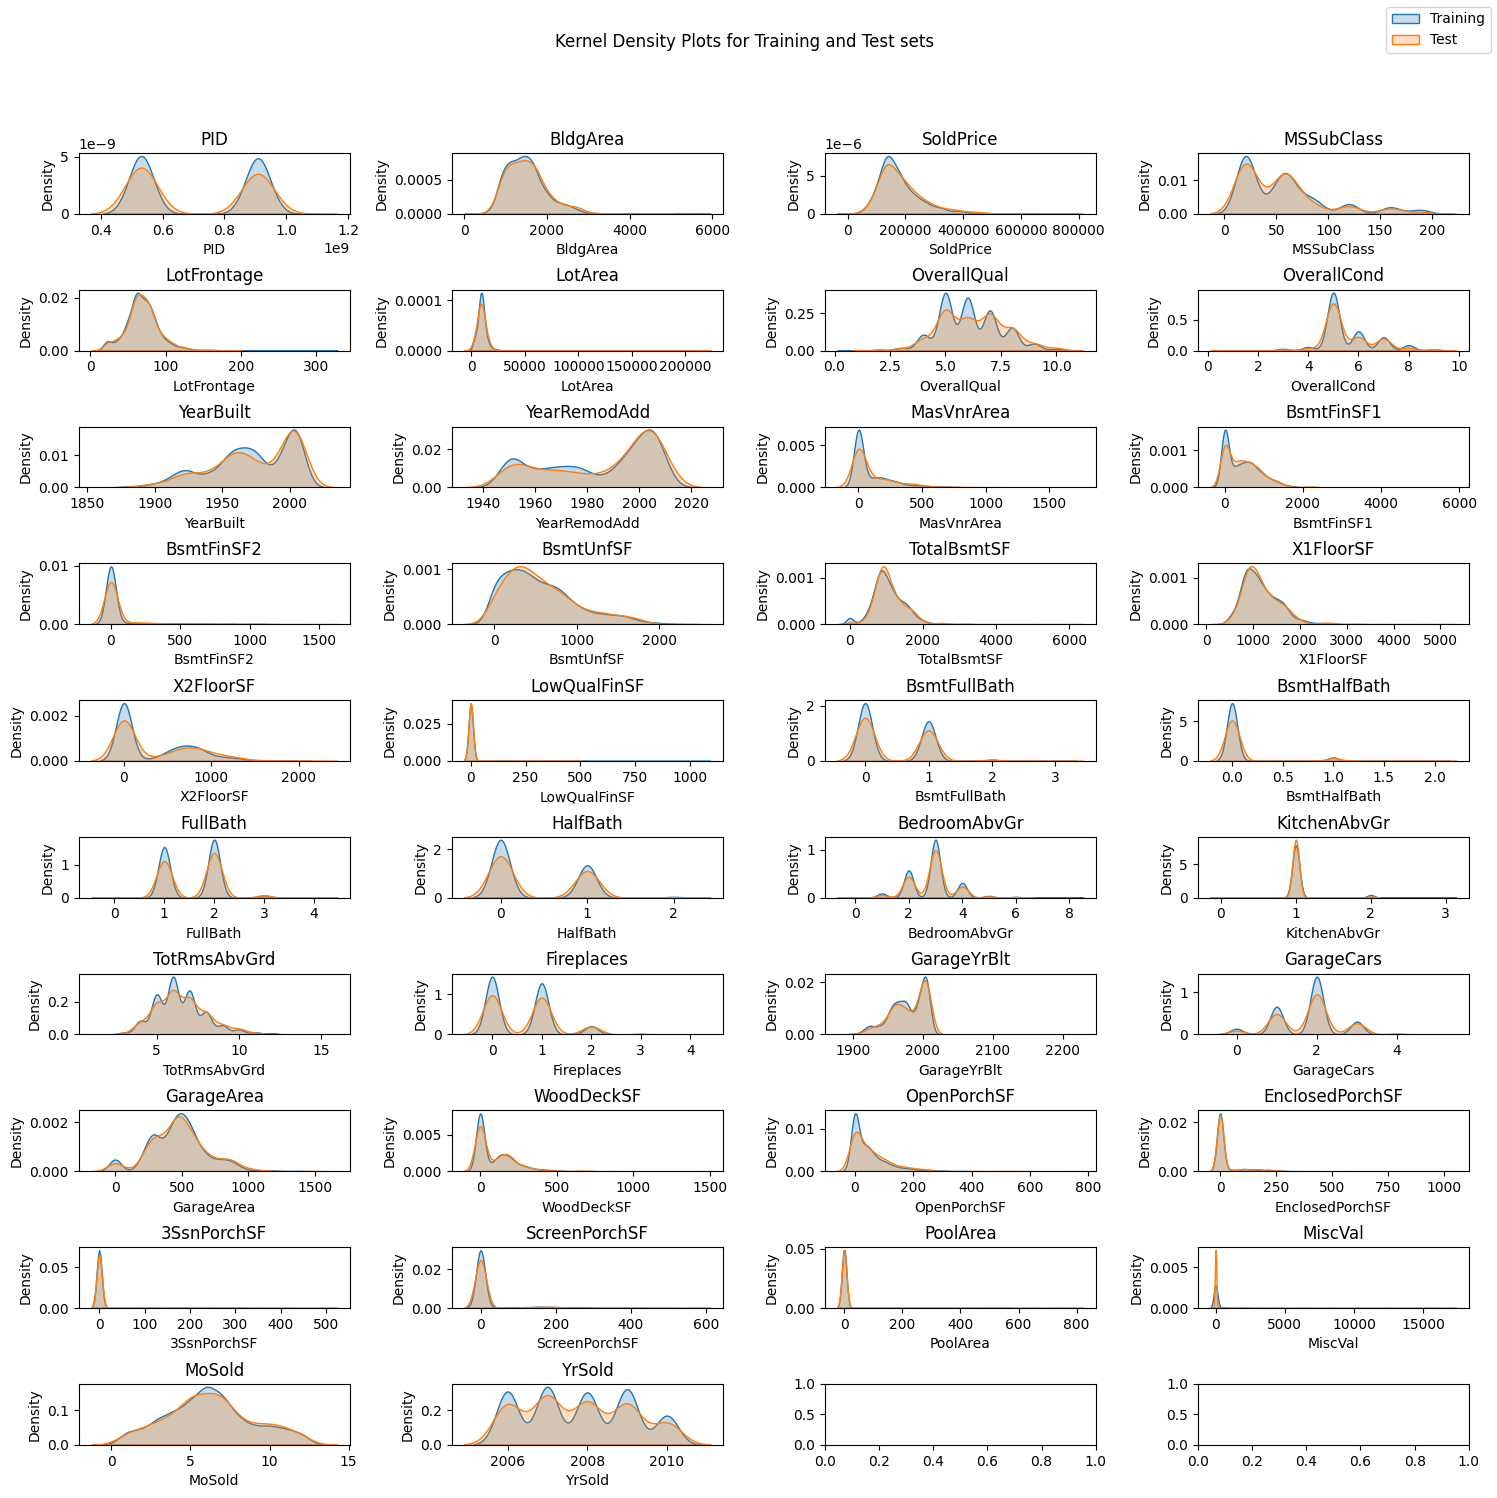

In [178]:
# Filter columns to include only numerical variables
numeric_train = data_train.select_dtypes(include=['int64', 'float64'])
numeric_test = data_test.select_dtypes(include=['int64', 'float64'])

# Create subplots for each variable
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(15, 15))
fig.suptitle('Kernel Density Plots for Training and Test sets')

# Plot kernel density for each variable
for i, (var_name, var_data) in enumerate(numeric_train.items()):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    
    sns.kdeplot(var_data, ax=ax, label='Training', shade=True)
    sns.kdeplot(numeric_test[var_name], ax=ax, label='Test', shade=True)
    
    ax.set_title(var_name)

# Adjust spacing and show plot
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()  # Get handles and labels from the last subplot
plt.figlegend(handles, labels, loc='upper right')
plt.subplots_adjust(top=0.9)
plt.show()

warnings.filterwarnings('ignore', category=FutureWarning)



The obtained graphics shw that the distribution is similar, overall, for all the numeric variables, which a steeper pattern in the crves for the training set, due to the amount of data points.


##### 2.b.2. Target "SoldPrice" Variable Distribution
For the target "SoldPrice" variable, a more detailed statistical analysis is performed;

Firstly, we will plot the histogram for the varable in both datasets

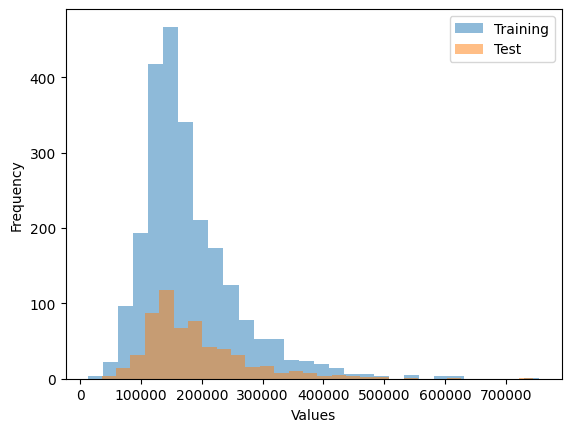

In [179]:
# Plot histograms for both variables
plt.hist(data_train['SoldPrice'], alpha=0.5, label='Training', bins=30)
plt.hist(data_test['SoldPrice'], alpha=0.5, label='Test', bins=30)

# Add labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

Secondly, we will get the basic descriptive statistics od the variable for both train and test datasets.

In [180]:
print('Training dataset:')
print(data_train['SoldPrice'].describe())

print('Test dataset:')
print(data_test['SoldPrice'].describe())


Training dataset:
count      2344.000000
mean     178835.841724
std       78334.848814
min       12789.000000
25%      128987.500000
50%      159900.000000
75%      211250.000000
max      755000.000000
Name: SoldPrice, dtype: float64
Test dataset:
count       586.000000
mean     188636.933447
std       85435.424709
min       34900.000000
25%      131000.000000
50%      168250.000000
75%      224800.000000
max      745000.000000
Name: SoldPrice, dtype: float64


## ADD CONCLUSSIONS HERE

### 3. Preprocessing

While the preprocessing step was indicated to do after the visual and descriptive analysis, we consciously decided it to do it as a previous step. This decision is driven by the fact that our dataset contains a big amount of categorical variables, which can be better analysed and understood in the descriptive analysis once they have been encoded. Moreover, the variables naming and NA handling will also take place at this point.

#### 3.a. Categorical Variables Encoding

As stated before, our dataset has a total of 44 categorical variables, which represents ore than half of the total dataset variables. This scenario requires defining strategies for encoding the categorical variables into numerical ones, for being able to use them in the Machine Learning models, some of which only allow numerical values.

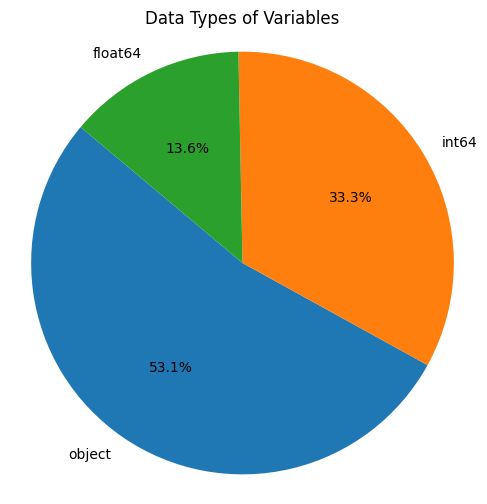

In [181]:
#Distribution of variables datatype

# Get data types of columns
data_types = data.dtypes

# Count occurrences of each data type
type_counts = data_types.value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Data Types of Variables')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

As a first step, for approaching the encoding, we will divide the categorical variables into three different lists, according to the type of information they contain:

**ordinal:** variables which categories can be transformed into an ordinal sequence of numbers

**binary:** variables that have only two possible categories

**nominal:** nominal variables which cannot be encoded as ordinal or binary

In [182]:
####CHECK THE NAMES HERE
ordinal = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQual', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQual', 'Fence', 'PavedDrive' ]
binary = ['Street', 'CentralAir']
nominal = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
other = ['Alley']

In [183]:
#Converting ordinal variables into numerical

LotShape = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
Utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
LandSlope = {'Gtl': 1, 'Mod': 2, 'Sev': 3}
ExterQual = {'Ex': 5, 'Gd': 4, 'Ta': 3, 'Fa': 2, 'Po': 1}
ExterCond = {'Ex': 5, 'Gd': 4, 'Ta': 3, 'Fa': 2, 'Po': 1}
BsmtQual = {'Ex': 6, 'Gd': 5, 'Ta': 4, 'Fa': 3, 'Po': 1, 'NA': 0}
BsmtCond = {'Ex': 6, 'Gd': 5, 'Ta': 4, 'Fa': 3, 'Po': 1, 'NA': 0}
BsmtExposure = {'Ex': 5, 'Gd': 4, 'Ta': 3, 'Fa': 2, 'Po': 1}
BsmtFinType1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'Lwq': 2, 'Unf': 1, 'Na':0}
BsmtFinType2 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'Lwq': 2, 'Unf': 1, 'Na':0}
HeatingQual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
KitchenQual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
Functional = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
FireplaceQu = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
GarageFinish = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
GarageQual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
GarageCond = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
PoolQual = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Na': 0}
Fence = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0}
PavedDrive = {'N': 0, 'P': 1, 'Y': 2}

data_train['LotShape'] = data_train['LotShape'].map(LotShape)
data_train['Utilities'] = data_train['Utilities'].map(Utilities)
data_train['LandSlope'] = data_train['LandSlope'].map(LandSlope)
data_train['ExterQual'] = data_train['ExterQual'].map(ExterQual)
data_train['ExterCond'] = data_train['ExterCond'].map(ExterCond)
data_train['BsmtQual'] = data_train['BsmtQual'].map(BsmtQual)
data_train['BsmtCond'] = data_train['BsmtCond'].map(BsmtCond)
data_train['BsmtExposure'] = data_train['BsmtExposure'].map(BsmtExposure)
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].map(BsmtFinType1)
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].map(BsmtFinType2)
data_train['HeatingQual'] = data_train['HeatingQual'].map(HeatingQual)
data_train['KitchenQual'] = data_train['KitchenQual'].map(KitchenQual)
data_train['Functional'] = data_train['Functional'].map(Functional)
data_train['FireplaceQu'] = data_train['FireplaceQu'].map(FireplaceQu)
data_train['GarageFinish'] = data_train['GarageFinish'].map(GarageFinish)
data_train['GarageQual'] = data_train['GarageQual'].map(GarageQual)
data_train['GarageCond'] = data_train['GarageCond'].map(GarageCond)
data_train['PoolQual'] = data_train['PoolQual'].map(PoolQual)
data_train['Fence'] = data_train['Fence'].map(Fence)
data_train['PavedDrive'] = data_train['PavedDrive'].map(PavedDrive)

In the Ordinal columns, the "NA" values are not actually missing values, instead they indicate that the propery doesn't have the analysed feature (ex: Pool uqality = 0 means that the house does not have a pool). Consequently, the NA values in these ordinal variables are encoded to 0 value

In [184]:
# Iterate through the columns in the 'ordinal' list and fill NA values with 0
for column in ordinal:
    data_train[column].fillna(0, inplace=True)

The next step consists in encoding the binary variables, converting the values into 1 and 0.

In [185]:
#Convert binary variables into numerical

Street = {'Grvl': 0, 'Pave': 1}
CentralAir = {'N': 0, 'Y': 1}

data_train['Street'] = data_train['Street'].map(Street)
data_train['CentralAir'] = data_train['CentralAir'].map(CentralAir)

For the case of the 'Alley' variable, giving that it has 3 categories, 2 indicating different types of alley material (which a small amunt of positive rows each one), and the third type indicating that the house doesn't have an alley, the variable is also coverted to a binary variable, indicating the existence or not of an alley.

In [186]:
#Encode
Alley = {'Grvl': 1, 'Pave': 1, 'NA': 0}
data_train['Alley'] = data_train['Alley'].map(Alley)

#Fill NA
data_train['Alley'].fillna(0, inplace=True)

The nominal variables will be encoded ina separated step, after handling the NA values in the dataset

#### 3.b. Handling NA values
A second step in the dataprocessing workflow, we will handle NA values.

As a first step we will check which are the columns that have missing values and the number, to decide what to do in each case


In [187]:
missing_values = data_train.isnull().sum().sort_values(ascending=False)
print(missing_values)

MiscFeature        2262
MasVnrType         1427
LotFrontage         402
GarageYrBlt         129
GarageType          128
MasVnrArea           19
Electrical            1
GarageCars            1
BsmtFullBath          1
BsmtHalfBath          1
GarageArea            1
TotRmsAbvGrd          0
Fireplaces            0
Functional            0
PID                   0
KitchenQual           0
KitchenAbvGr          0
FireplaceQu           0
HalfBath              0
FullBath              0
LowQualFinSF          0
X2FloorSF             0
X1FloorSF             0
BedroomAbvGr          0
GarageFinish          0
HeatingQual           0
PoolArea              0
SaleType              0
YrSold                0
MoSold                0
MiscVal               0
Fence                 0
PoolQual              0
ScreenPorchSF         0
GarageQual            0
3SsnPorchSF           0
EnclosedPorchSF       0
OpenPorchSF           0
WoodDeckSF            0
PavedDrive            0
GarageCond            0
CentralAir      

As happened before with the encoded ordinal variables, there are also some categorical and numerical variables in which the 'NA' values dont imply absence of data, but the inexistence of the item. This is the case for 'MiscFeature', 'MasVnrType', 'GarageType', 'MasVnrArea' and 'GarageArea'.

In these cases, we will check the datatype of the caegory, and fill with 0 (for numerical) or 'None' (for categorical)

In [188]:
#Checking datatype
print(f'MiscFeature: {data_train["MiscFeature"].dtype}')
print(f'MasVnrType: {data_train["MasVnrType"].dtype}')
print(f'GarageType: {data_train["GarageType"].dtype}')
print(f'MasVnrArea: {data_train["MasVnrArea"].dtype}')
print(f'GarageArea: {data_train["GarageArea"].dtype}')

#Filling NAs
data_train['MiscFeature'].fillna('None', inplace=True)
data_train['MasVnrType'].fillna('None', inplace=True)
data_train['GarageType'].fillna('None', inplace=True)
data_train['MasVnrArea'].fillna(0, inplace=True)
data_train['GarageArea'].fillna(0, inplace=True)

MiscFeature: object
MasVnrType: object
GarageType: object
MasVnrArea: float64
GarageArea: float64


In [189]:
missing_values = data_train.isnull().sum().sort_values(ascending=False)
print(missing_values)

LotFrontage        402
GarageYrBlt        129
BsmtHalfBath         1
BsmtFullBath         1
GarageCars           1
Electrical           1
X1FloorSF            0
X2FloorSF            0
LowQualFinSF         0
CentralAir           0
GarageFinish         0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
KitchenQual          0
TotRmsAbvGrd         0
Functional           0
Fireplaces           0
FireplaceQu          0
GarageType           0
FullBath             0
PID                  0
Heating              0
PoolArea             0
SaleType             0
YrSold               0
MoSold               0
MiscVal              0
MiscFeature          0
Fence                0
PoolQual             0
ScreenPorchSF        0
GarageArea           0
3SsnPorchSF          0
EnclosedPorchSF      0
OpenPorchSF          0
WoodDeckSF           0
PavedDrive           0
GarageCond           0
GarageQual           0
HeatingQual          0
TotalBsmtSF          0
BldgArea             0
Utilities  

Finally, the nominal variables are encoded using the One Hot Encoder method. This method creates a binary column for each category of each variable, allowing to keep all the information. The pandas package is used given that the numpy OneHotEncoder returns a numpy array, which would make the next preprocessing steps more complicated.

In [94]:
# Perform one-hot encoding (returns True/False values)
data_train = pd.get_dummies(data_train, columns=nominal, prefix=nominal, dtype=int)


In [95]:
data_train.columns

Index(['PID', 'BldgArea', 'SoldPrice', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'Utilities', 'LandSlope',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_VWD', 'SaleType_WD ',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=243)

In [99]:
data_train.head()

,PID,BldgArea,SoldPrice,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
2880,911175430,480,35311,50.0,9000,1,0.0,4,4,1,...,0,0,0,1,1,0,0,0,0,0
1289,902105130,672,64000,60.0,4800,1,0.0,4,4,1,...,0,0,0,1,0,0,0,0,1,0
2322,527146135,2687,270000,68.0,13108,1,0.0,3,4,1,...,0,0,0,1,0,0,0,0,1,0
1165,533213070,1501,179400,24.0,2280,1,0.0,4,4,1,...,0,0,0,1,0,0,0,0,1,0
1515,909101180,1716,135900,55.0,5687,1,0.0,4,4,1,...,0,0,0,1,0,0,0,0,1,0


### Section 2: Visual description of the dataset

### Section 3: Statistical description of the dataset

##### 3.A. Descriptive statistical analysis

##### 3.B. Potential correlation

##### 3.C. Potential pre-processing (we can probably move this to before visual description)?

1. To manage missing values, 
- We cannot drop all rows with any missing value because there are some columns with very few non-null values (e.g. PoolQC -7 non null, MiscValue, MiscFeature - 54 non null). So dropping these rows (on 'any' columns) would mean losing a lot of data.

- To handle this, we first drop the columns that have missing values for more than half of the training sample. This leaves us with xxxx columns of explanatory variable.

- Then, for numeric variables, we replace missing values with the mean of the column. (This is because, at this stage too, we cannot drop rows with missing values because we would lose a lot of data. For example, the column  has only 770 non null values (train and test combined)).

- For categorical variables, we replace missing values with the mode of the column.

3. To normalize the data 
- We perform mean centring so that, for each numeric column mean is 0 and standard deviation is 1. 

4. To use categorical explanatory variables, 
- For binary variables, we use 0 and 1 to represent the two categories.
- For ordinal variables, we rank the categories and use the ranks as the values.
- For nominal variables, we use one-hot encoding to convert categorical variables into dummy/indicator variables. 


5. To add additional explanatory variables
- Summing up floor space across floors as a new explanatory variable

### Section 4: Proposed evaluation protocol

##### 4.A. Protocol for perfomance assessment, tuning of hyperparameter, splitting of data (data leaks  )

Tuning of hyperparameter:
1. We use k-fold cross validation to tune hyperparameters.
2. We use the test data to evaluate the performance of the model.

Preventing train-test data leaks
1. Ensuring pre processing steps such as filling with mean/mode, standardisation and [encoding](https://community.databricks.com/t5/machine-learning/do-one-hot-encoding-ohe-before-or-after-split-data-to-train-and/td-p/17888#:~:text=%22If%20you%20perform%20the%20encoding,scores%20but%20poor%20in%20deployment) happens after train-test split 
2. Fixing train and test samples while tuning hyperparameter

##### 4.B. Evaluation metric

Since our problem is defined as a regression problem, we will use the Root Mean Squared Error (RMSE) as the main metric. This is because RMSE is a good measure of how far the predicted values are from the actual value. It is also a good measure of how large the residuals are. In ordered to allow for a standardised comparison, we will calculate R2 score as well. R2 gives a measure of how much of the variance in the data is explained by the model.